<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/Experiments/Results/Images/different_seed_2Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
get_ipython().system('pip install -q git+https://github.com/keras-team/keras-cv.git')
get_ipython().system('pip install -q tensorflow==2.11.0')
get_ipython().system('pip install pyyaml h5py')

In [ ]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 1837, done.
remote: Counting objects: 100% (802/802), done.
remote: Compressing objects: 100% (320/320), done.
remote: Total 1837 (delta 596), reused 656 (delta 477), pack-reused 1035
Receiving objects: 100% (1837/1837), 108.46 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (1313/1313), done.
Updating files: 100% (37/37), done.


In [ ]:
import sys
import os
import numpy as np
from google.colab import drive
import urllib.request

### agree to mounting your Google Drive
drive.mount("/content/drive")

py_file_location = "/content/FineTuning/two_concepts"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_two_concepts as txt

Mounted at /content/drive
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### load stable diffusion class and placeholder tokens from textual_inversion.py
stable_diffusion = txt.StableDiffusion()

### set the placeholder tokens
placeholder_token_broccoli = "<my-broccoli-token>"
placeholder_token_emoji = "<my-emoji-token>"
placeholder_token_combined = "<my-broccoli-emoji-token>"

### add the tokens to the stable diffusion model
txt.adding_token(stable_diffusion, placeholder_token_broccoli, placeholder_token_emoji, placeholder_token_combined)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
492466864/492466864 [==============================] - 4s 0us/step


In [ ]:
### for downloading weights from Dropbox:
### if you want to use any other service than Dropbox, change the code underneath

### Replace "<file_id>" and "<file_name>" with the ID and name of your file
### The file id is the string of characters between "s/" and the next slash "/"
### example: https://www.dropbox.com/s/yttja9ihaoq2xhd/35epochs_weights_with_two_concepts.npy?dl=0
file_id = 'yttja9ihaoq2xhd'

### name óf file
file_name = '35epochs_weights_with_two_concepts.npy'
url = f'https://www.dropbox.com/s/{file_id}/{file_name}?dl=1'
filename = f'{file_name}.npy'

In [ ]:
### Download the file from the URL and save it locally
urllib.request.urlretrieve(url, filename=filename)

### Load the saved numpy file using numpy.load()
weights = np.load(filename, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(weights)

In [ ]:
### choose how much of an emoji your broccoli sticker should include
PERCENTAGE = 0.3
txt.percentage_emoji(stable_diffusion, placeholder_token_broccoli, placeholder_token_emoji, placeholder_token_combined, PERCENTAGE)

### insert your prompt here for just combining the tokens per prompt
prompt_combination = f" a {placeholder_token_broccoli} with {placeholder_token_emoji}"
### prompt for the two concepts "broccoli" and "emoji" combined by interpolation
prompt_interpolation = f"A happy {placeholder_token_combined}. "

### how many images are to be generated
number = 1



In the following we will generate broccoli stickers for the seeds 1,2,4,16 by connecting the tokens in the prompt and via interpolation to compare the results. The following pictures are created by combining the tokens in the prompt:


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198180272/198180272 [==============================] - 2s 0us/step


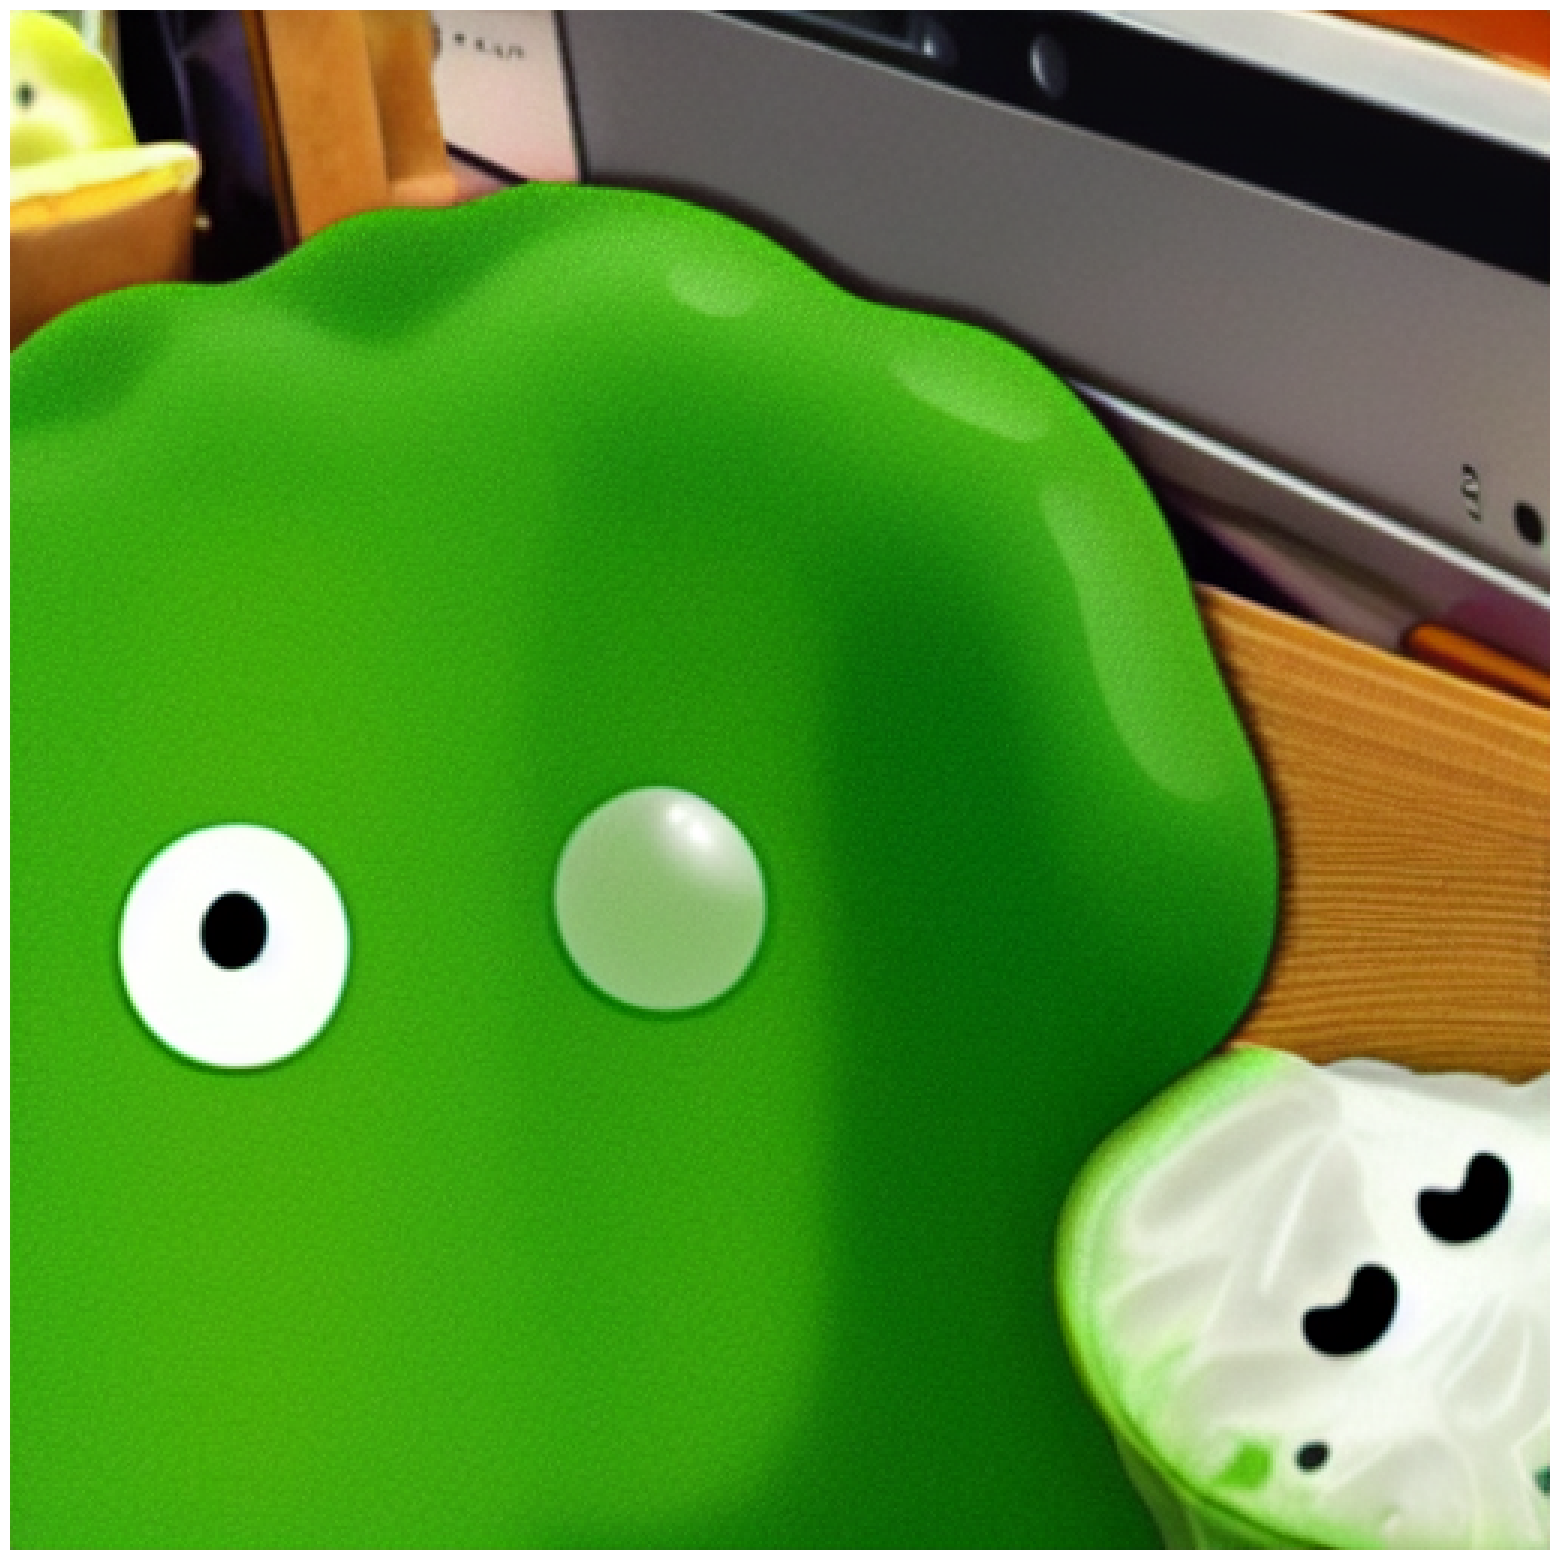

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size = number, num_steps = 30, seed=1
)
txt.plot_images(generated)

31/31 [==============================] - 34s 1s/step


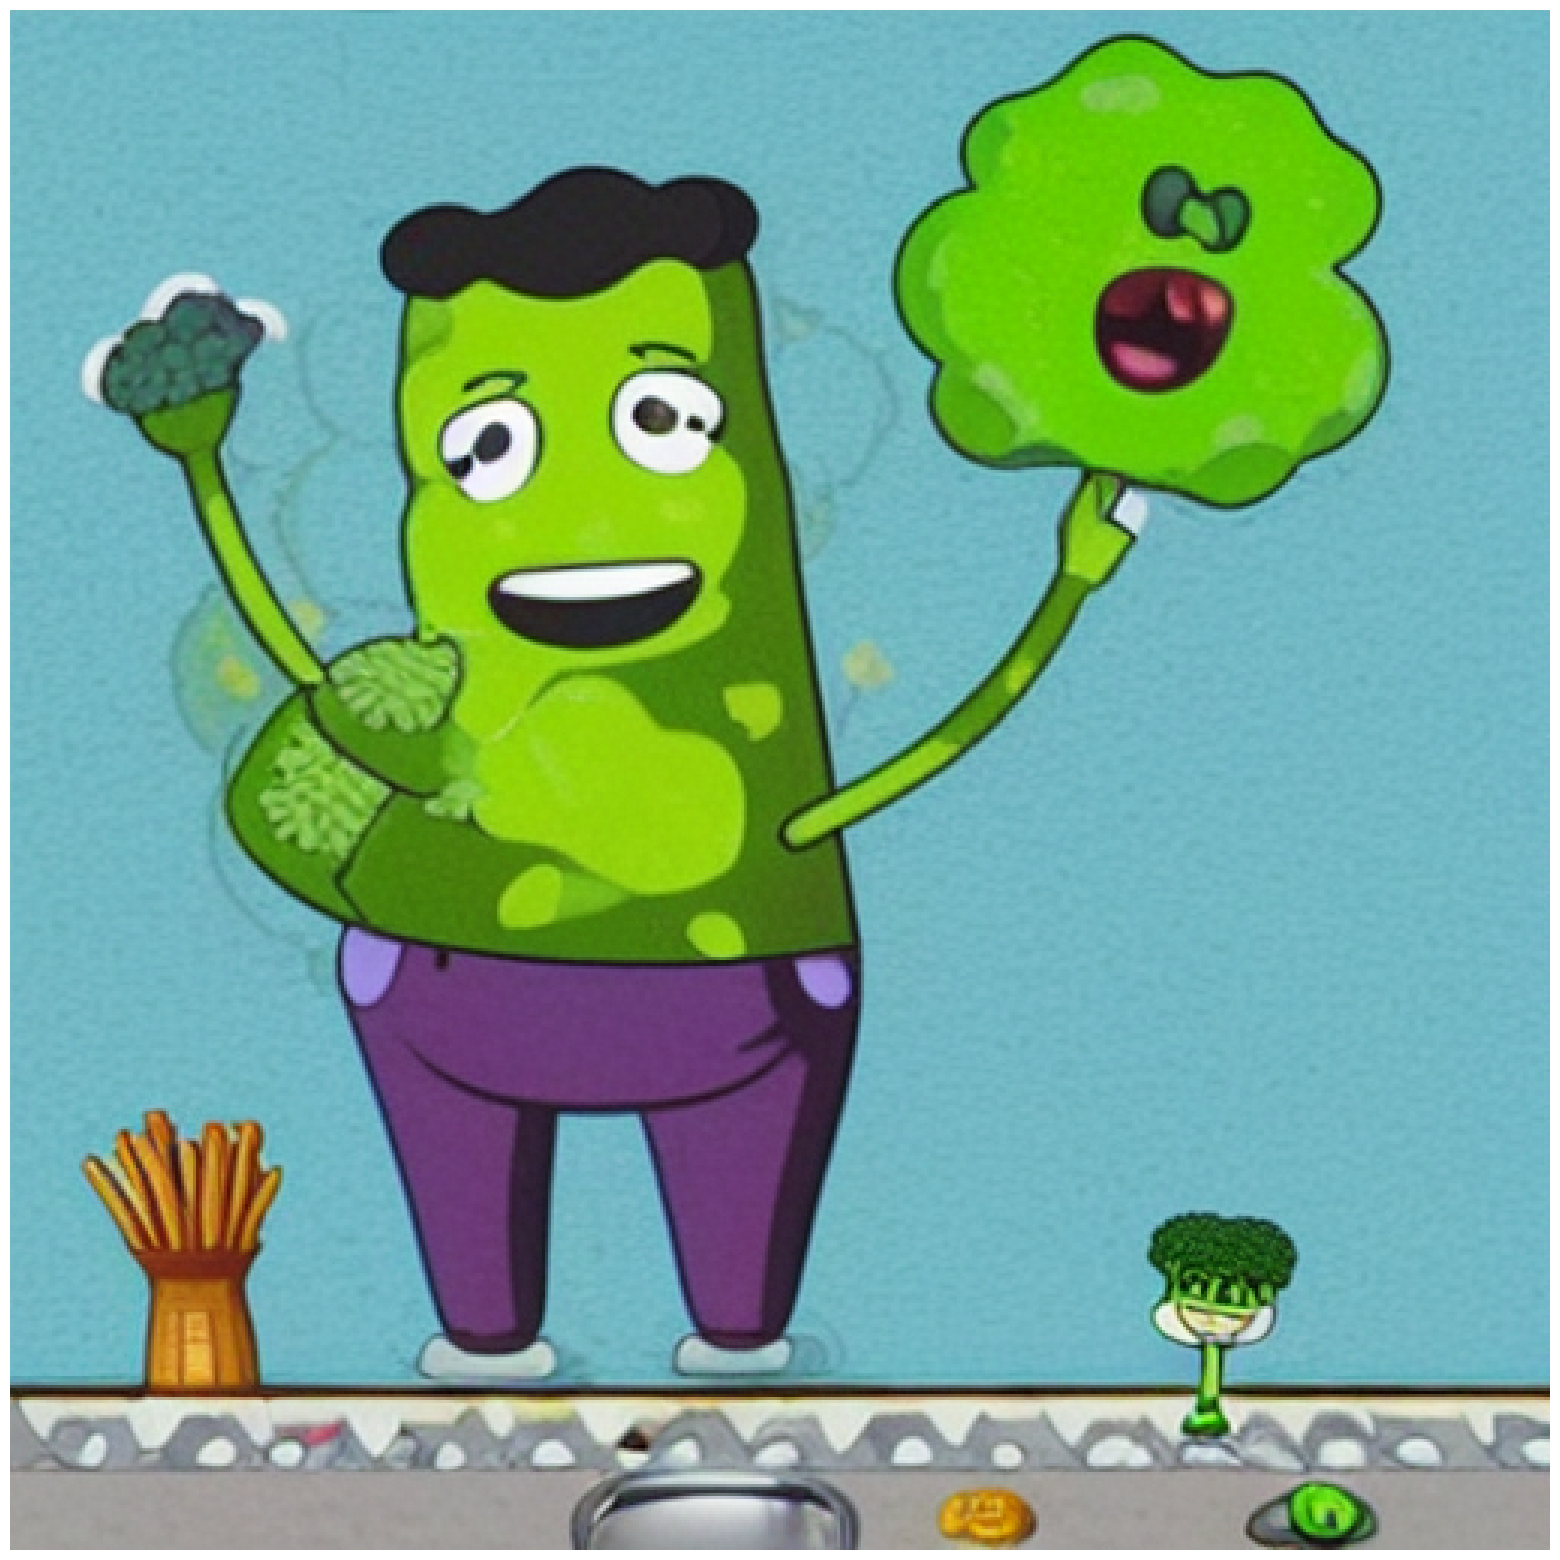

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size = number, num_steps = 30, seed=2
)
txt.plot_images(generated)

31/31 [==============================] - 34s 1s/step


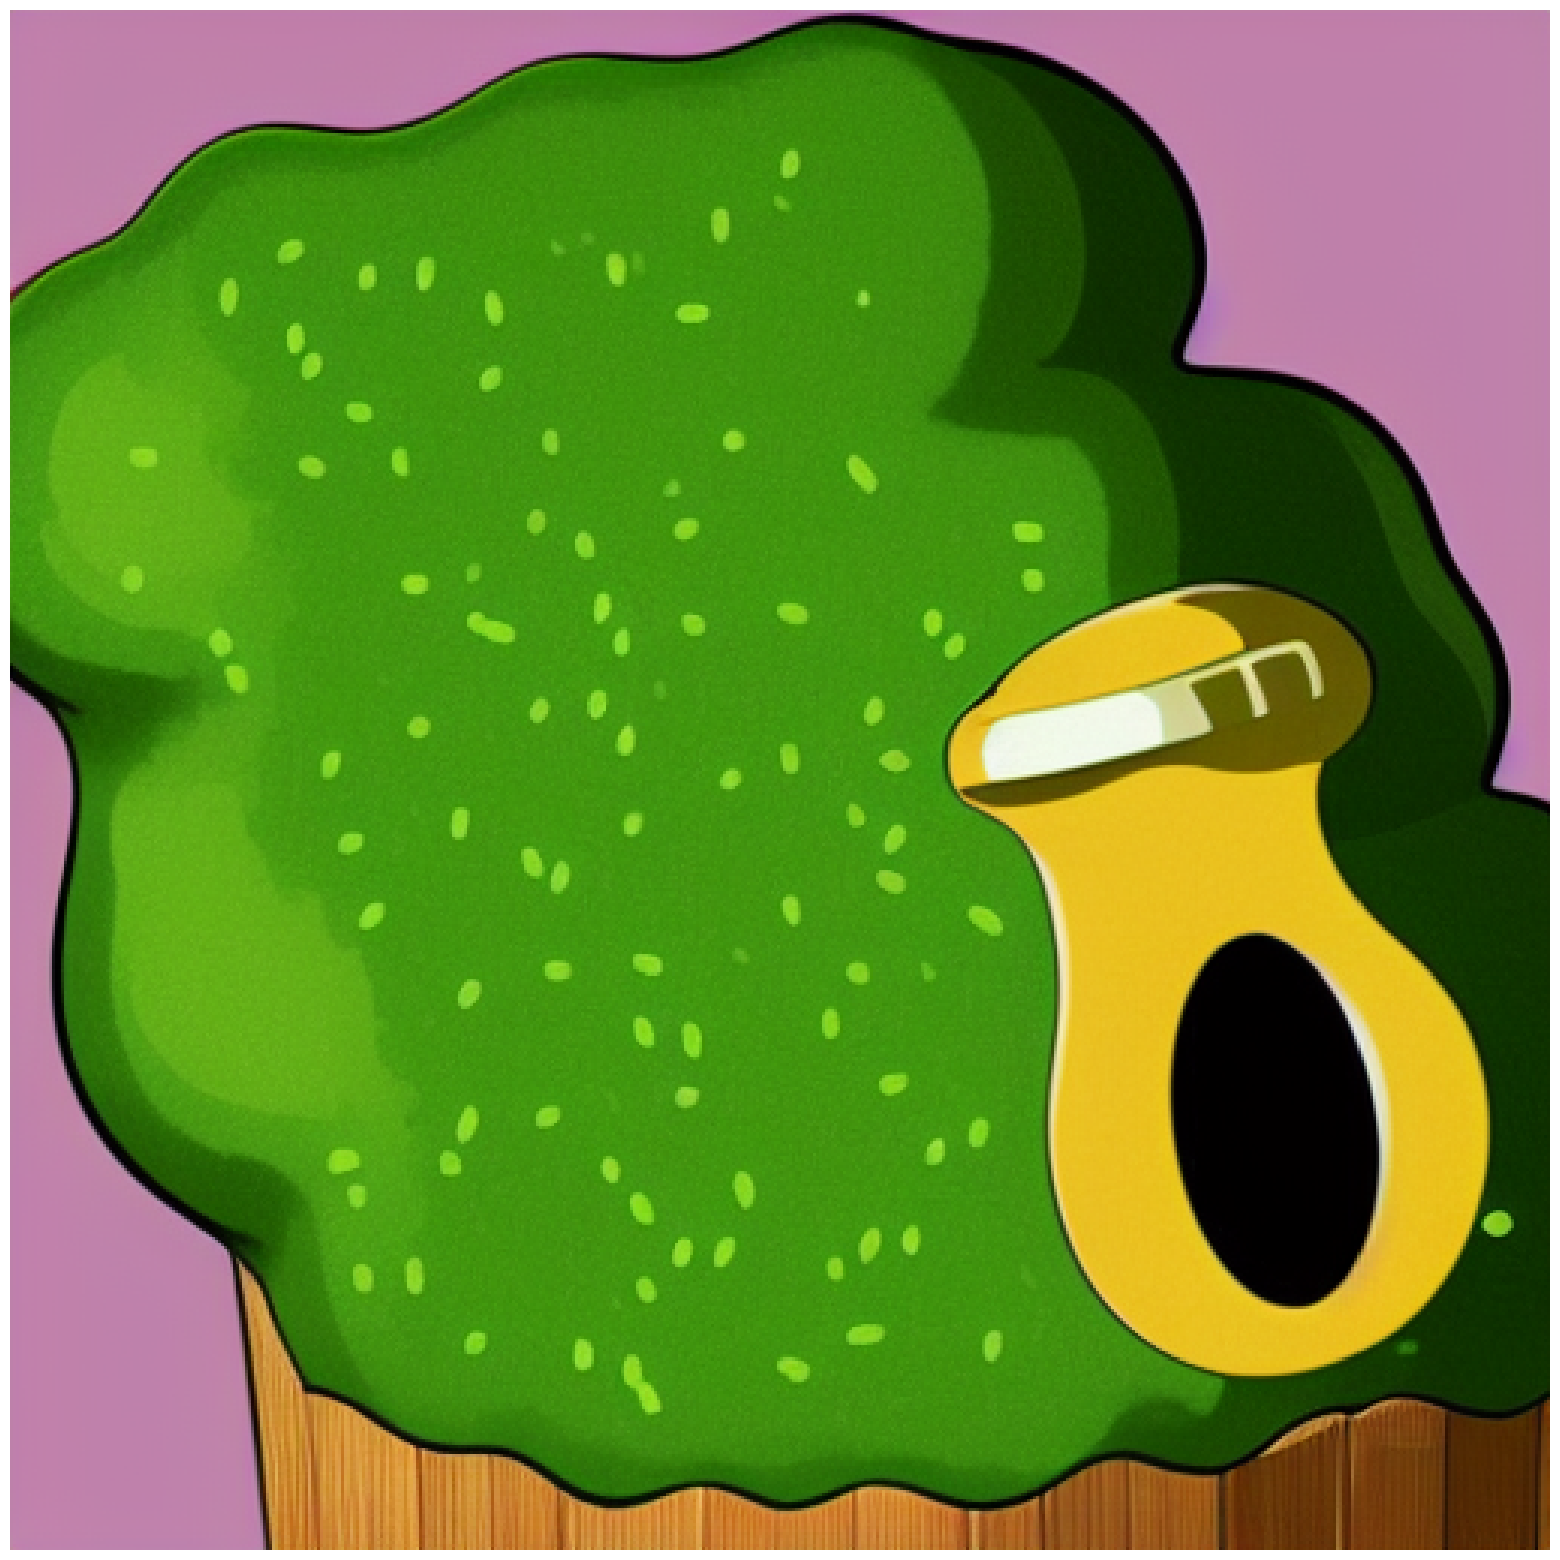

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size = number, num_steps = 30, seed=4
)
txt.plot_images(generated)

31/31 [==============================] - 35s 1s/step


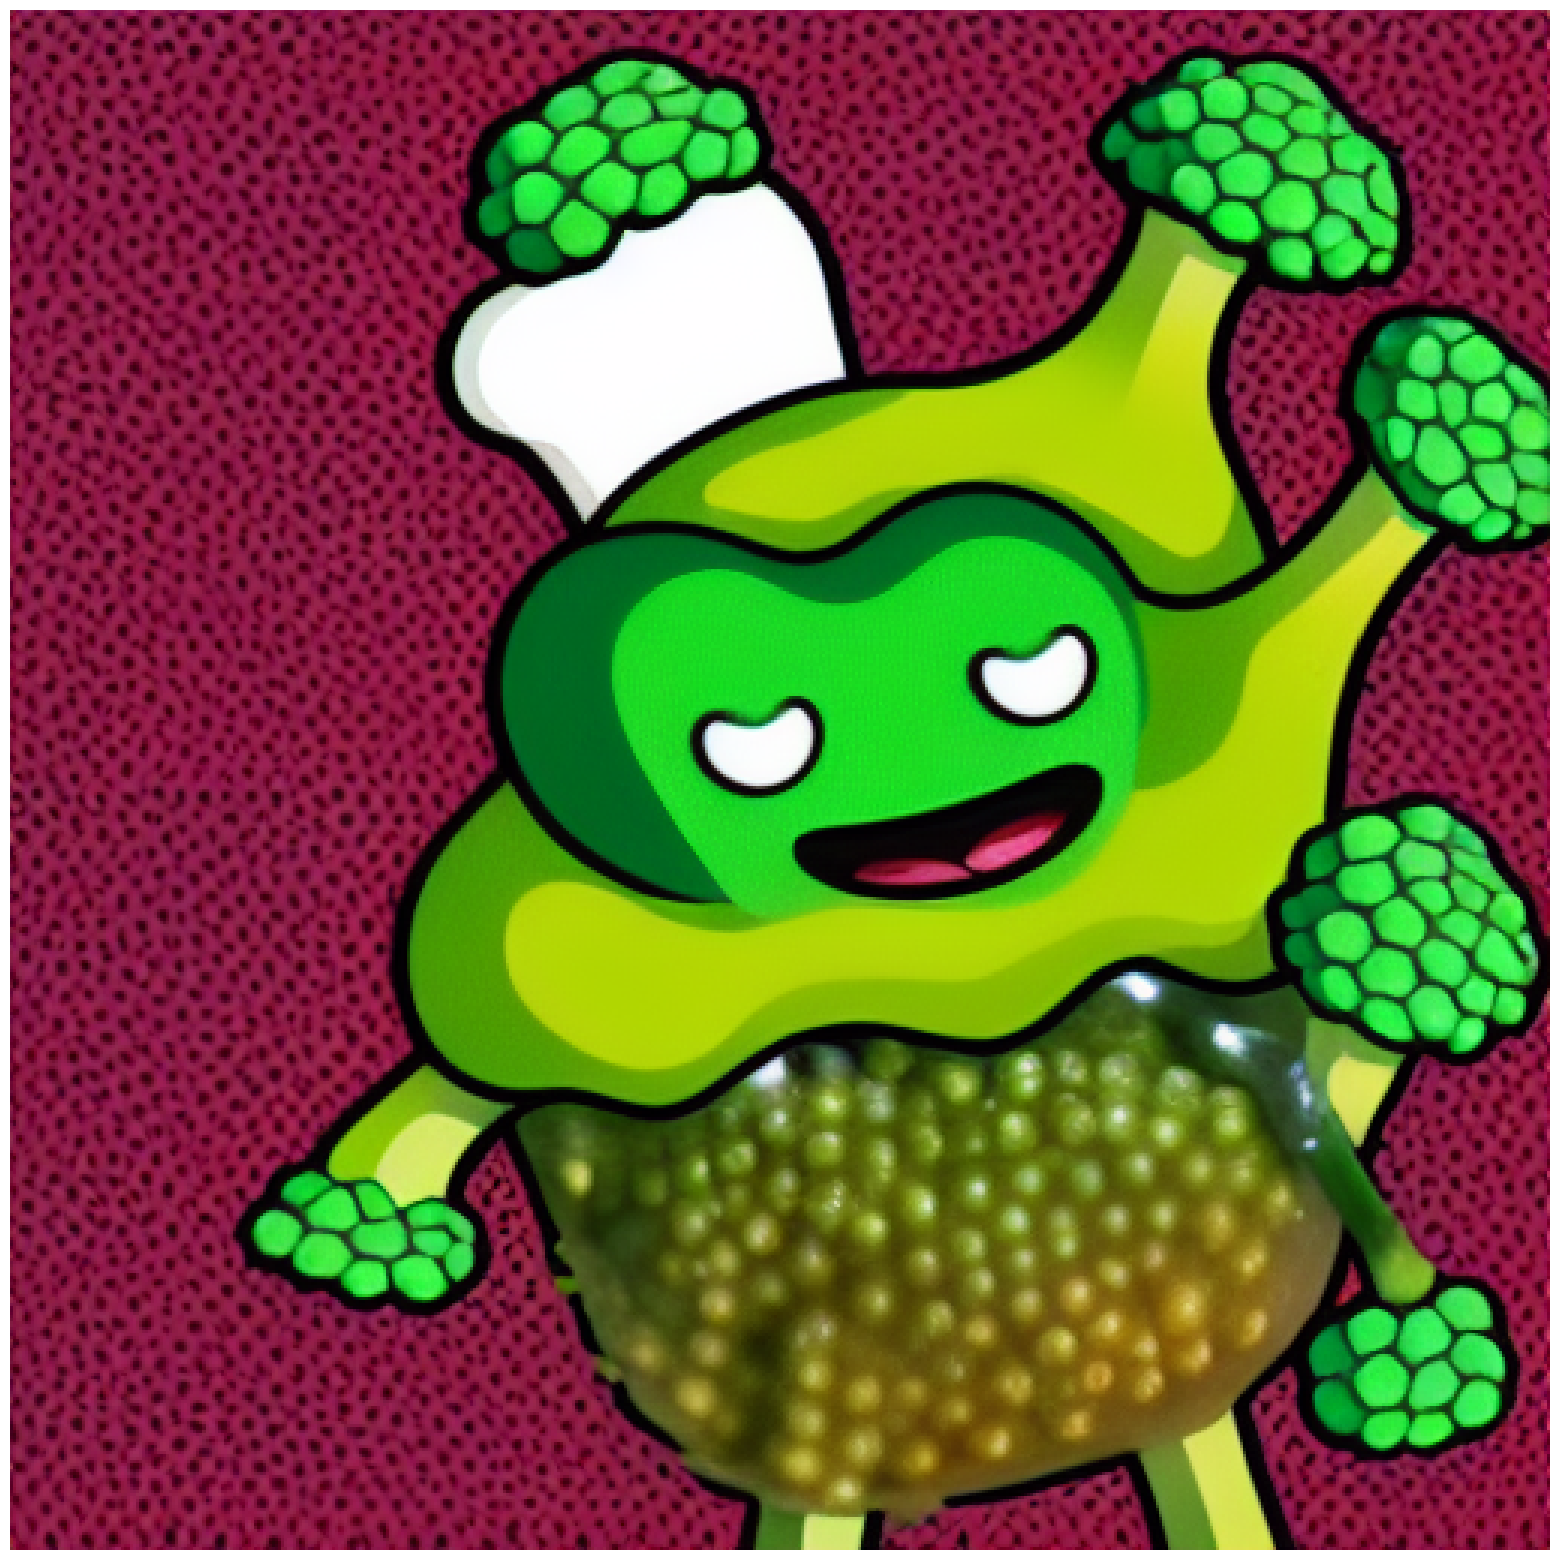

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size = number, num_steps = 30, seed=8
)
txt.plot_images(generated)

31/31 [==============================] - 34s 1s/step


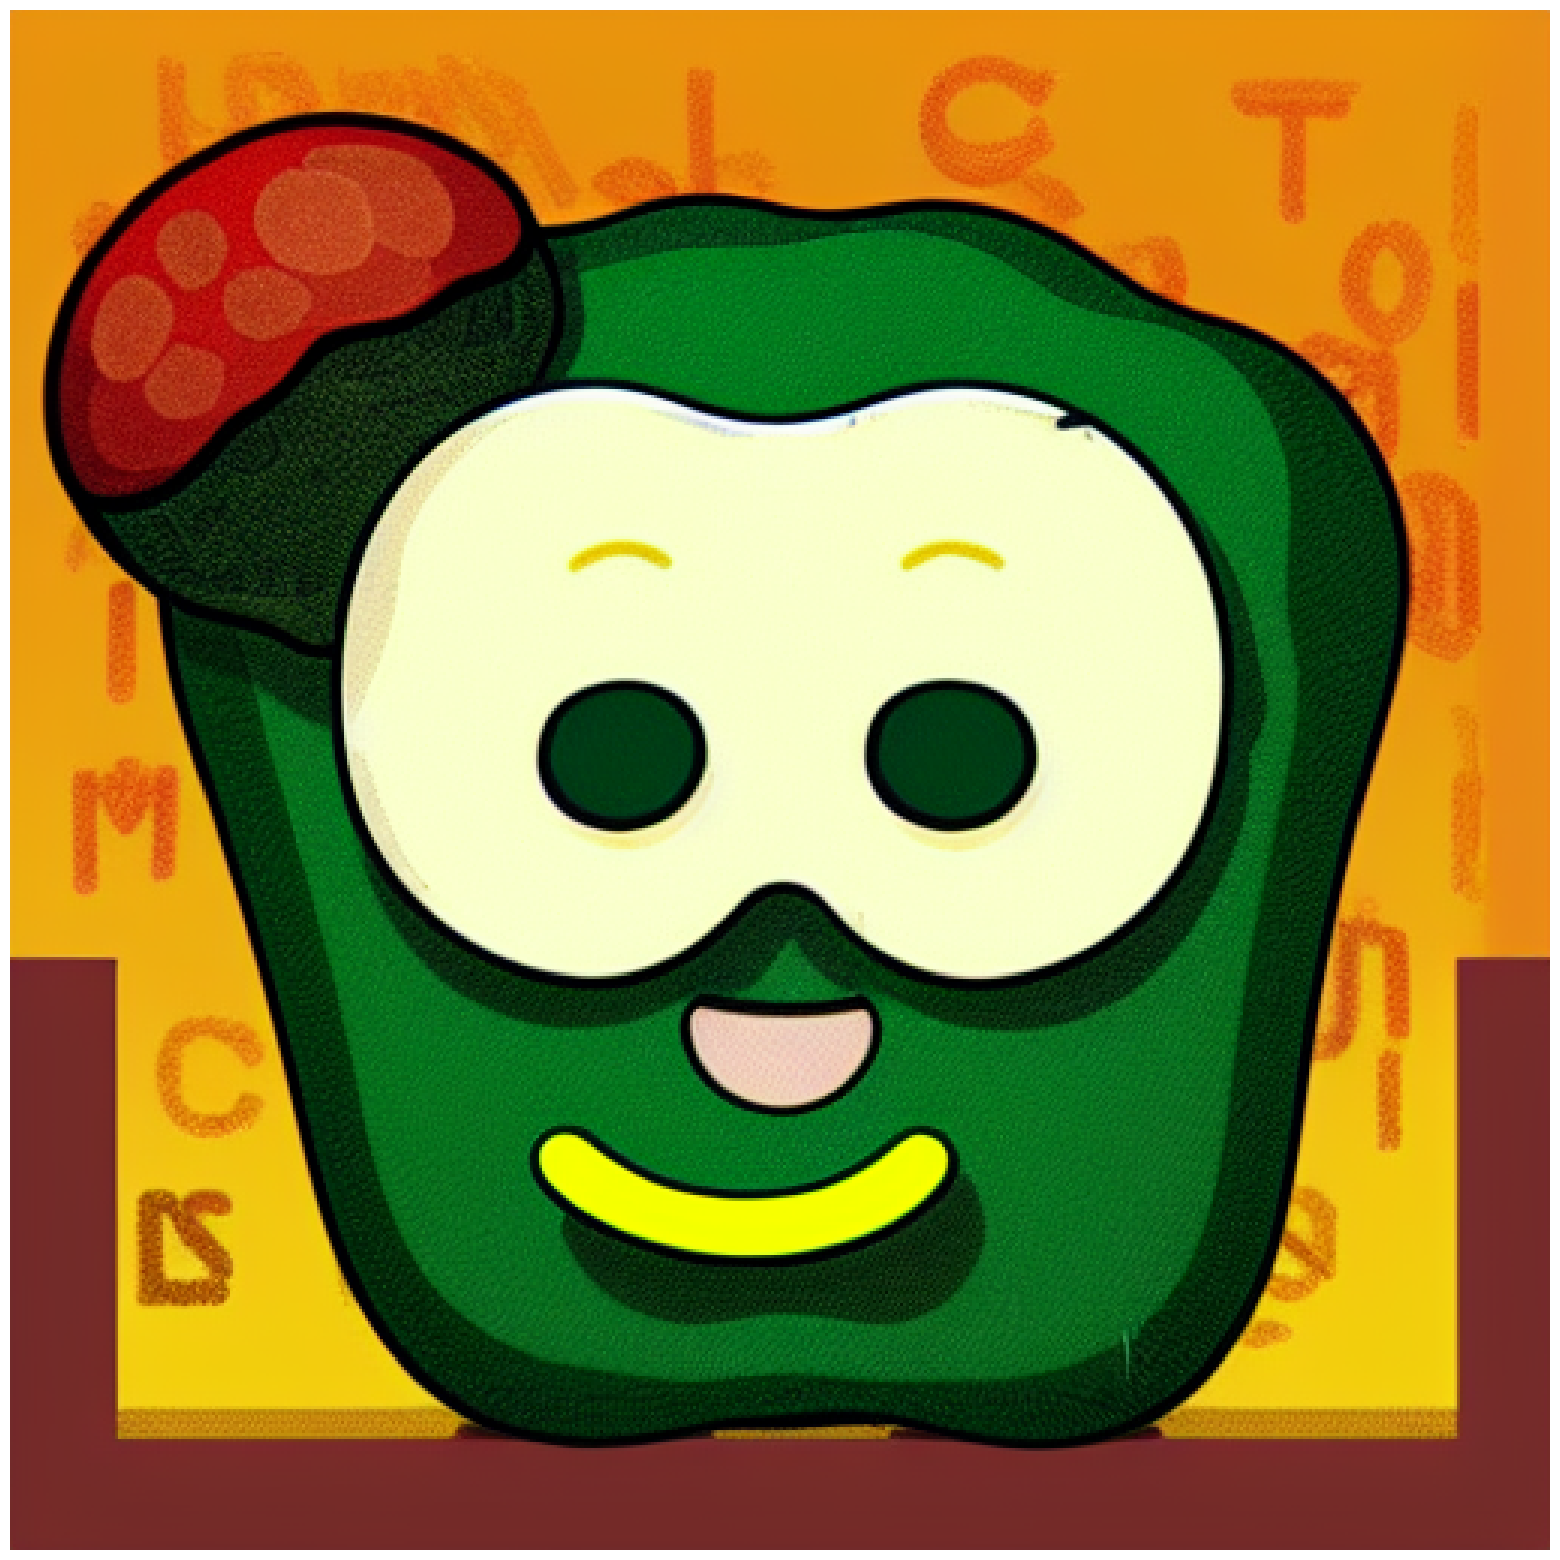

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size = number, num_steps = 30, seed=16
)
txt.plot_images(generated)

Same seeds, but with token interpolation:


25/25 [==============================] - 27s 1s/step


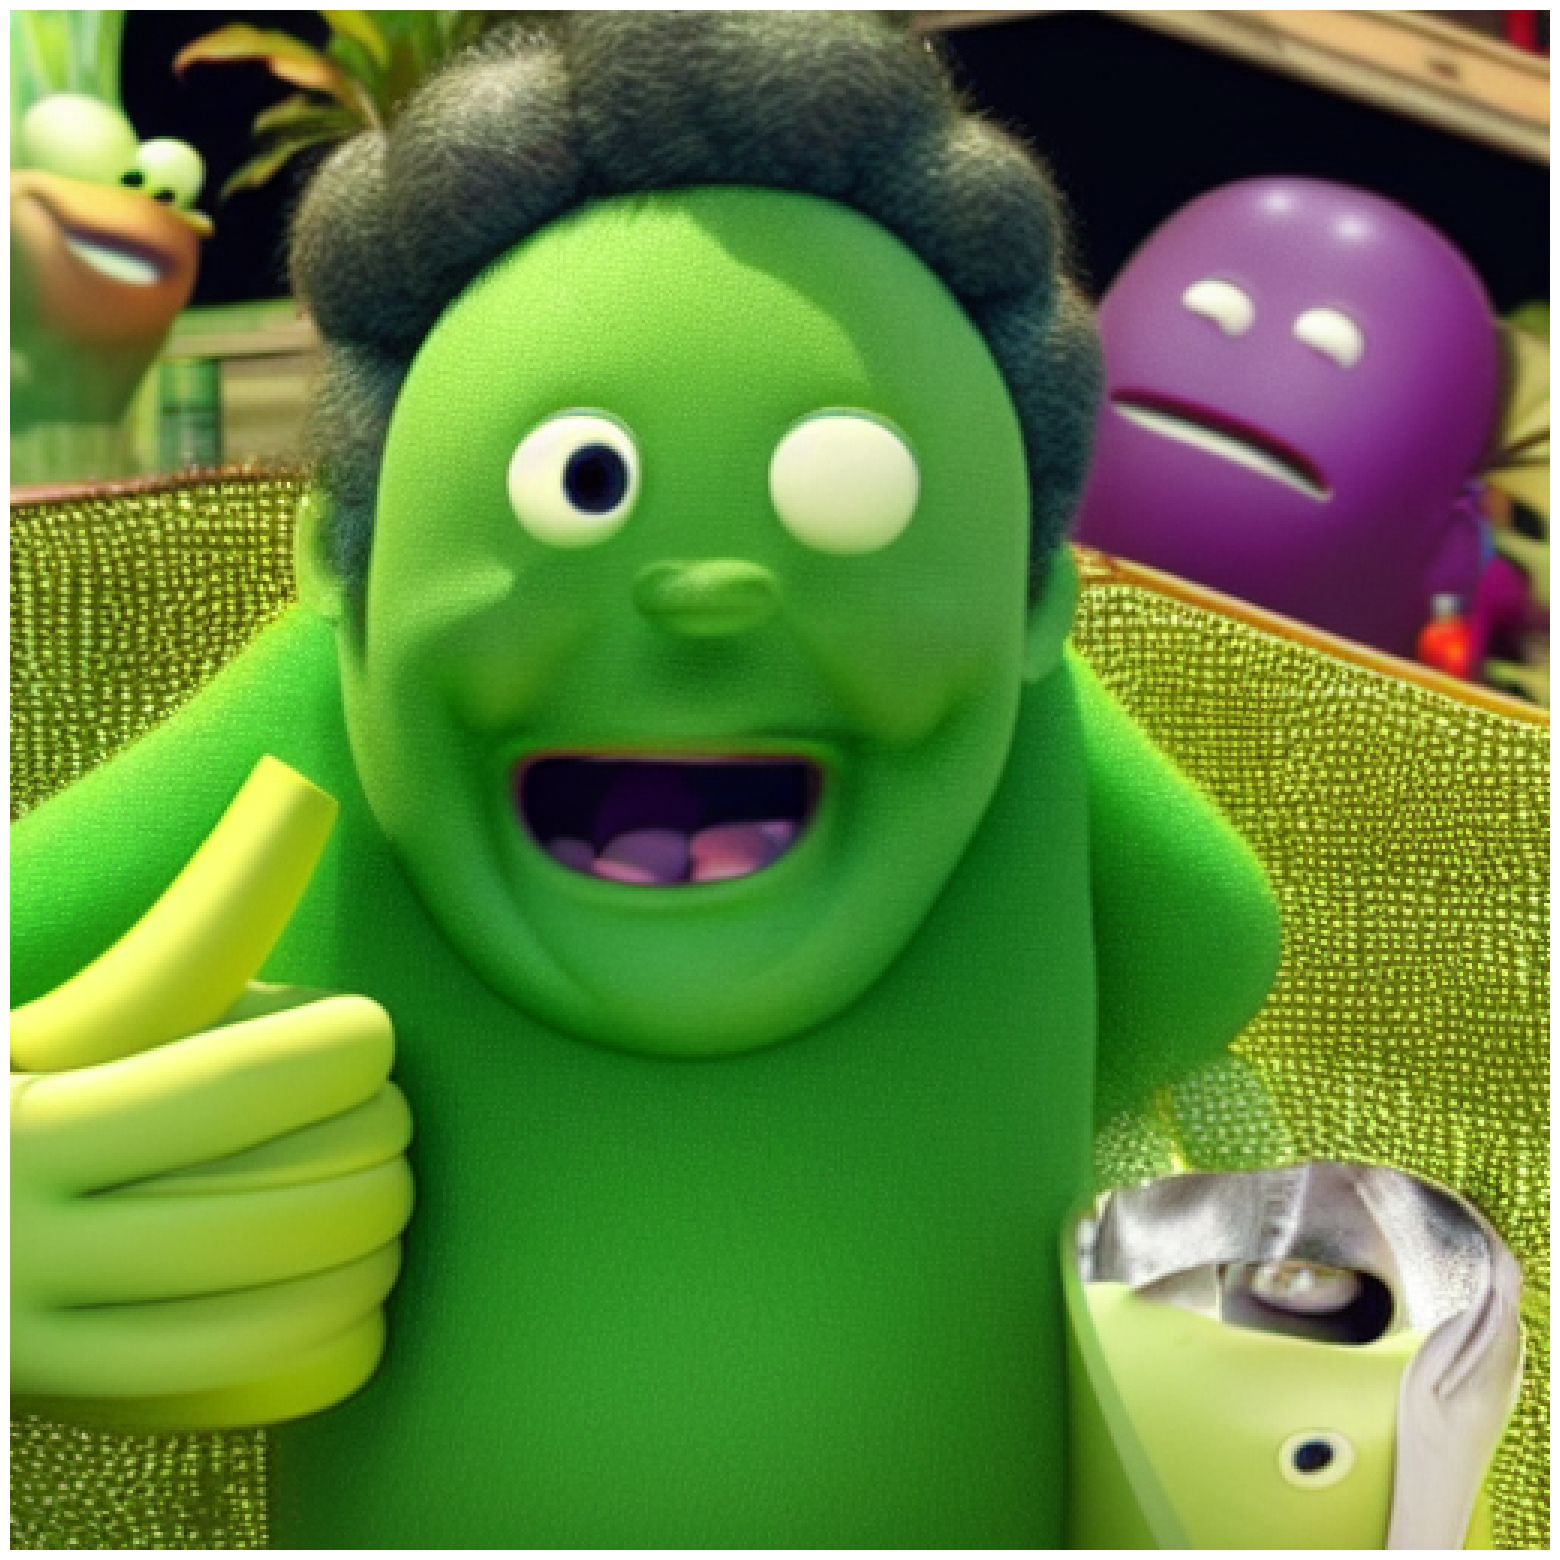

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_interpolation, batch_size = number, num_steps = 30, seed=1
)
txt.plot_images(generated)

31/31 [==============================] - 34s 1s/step


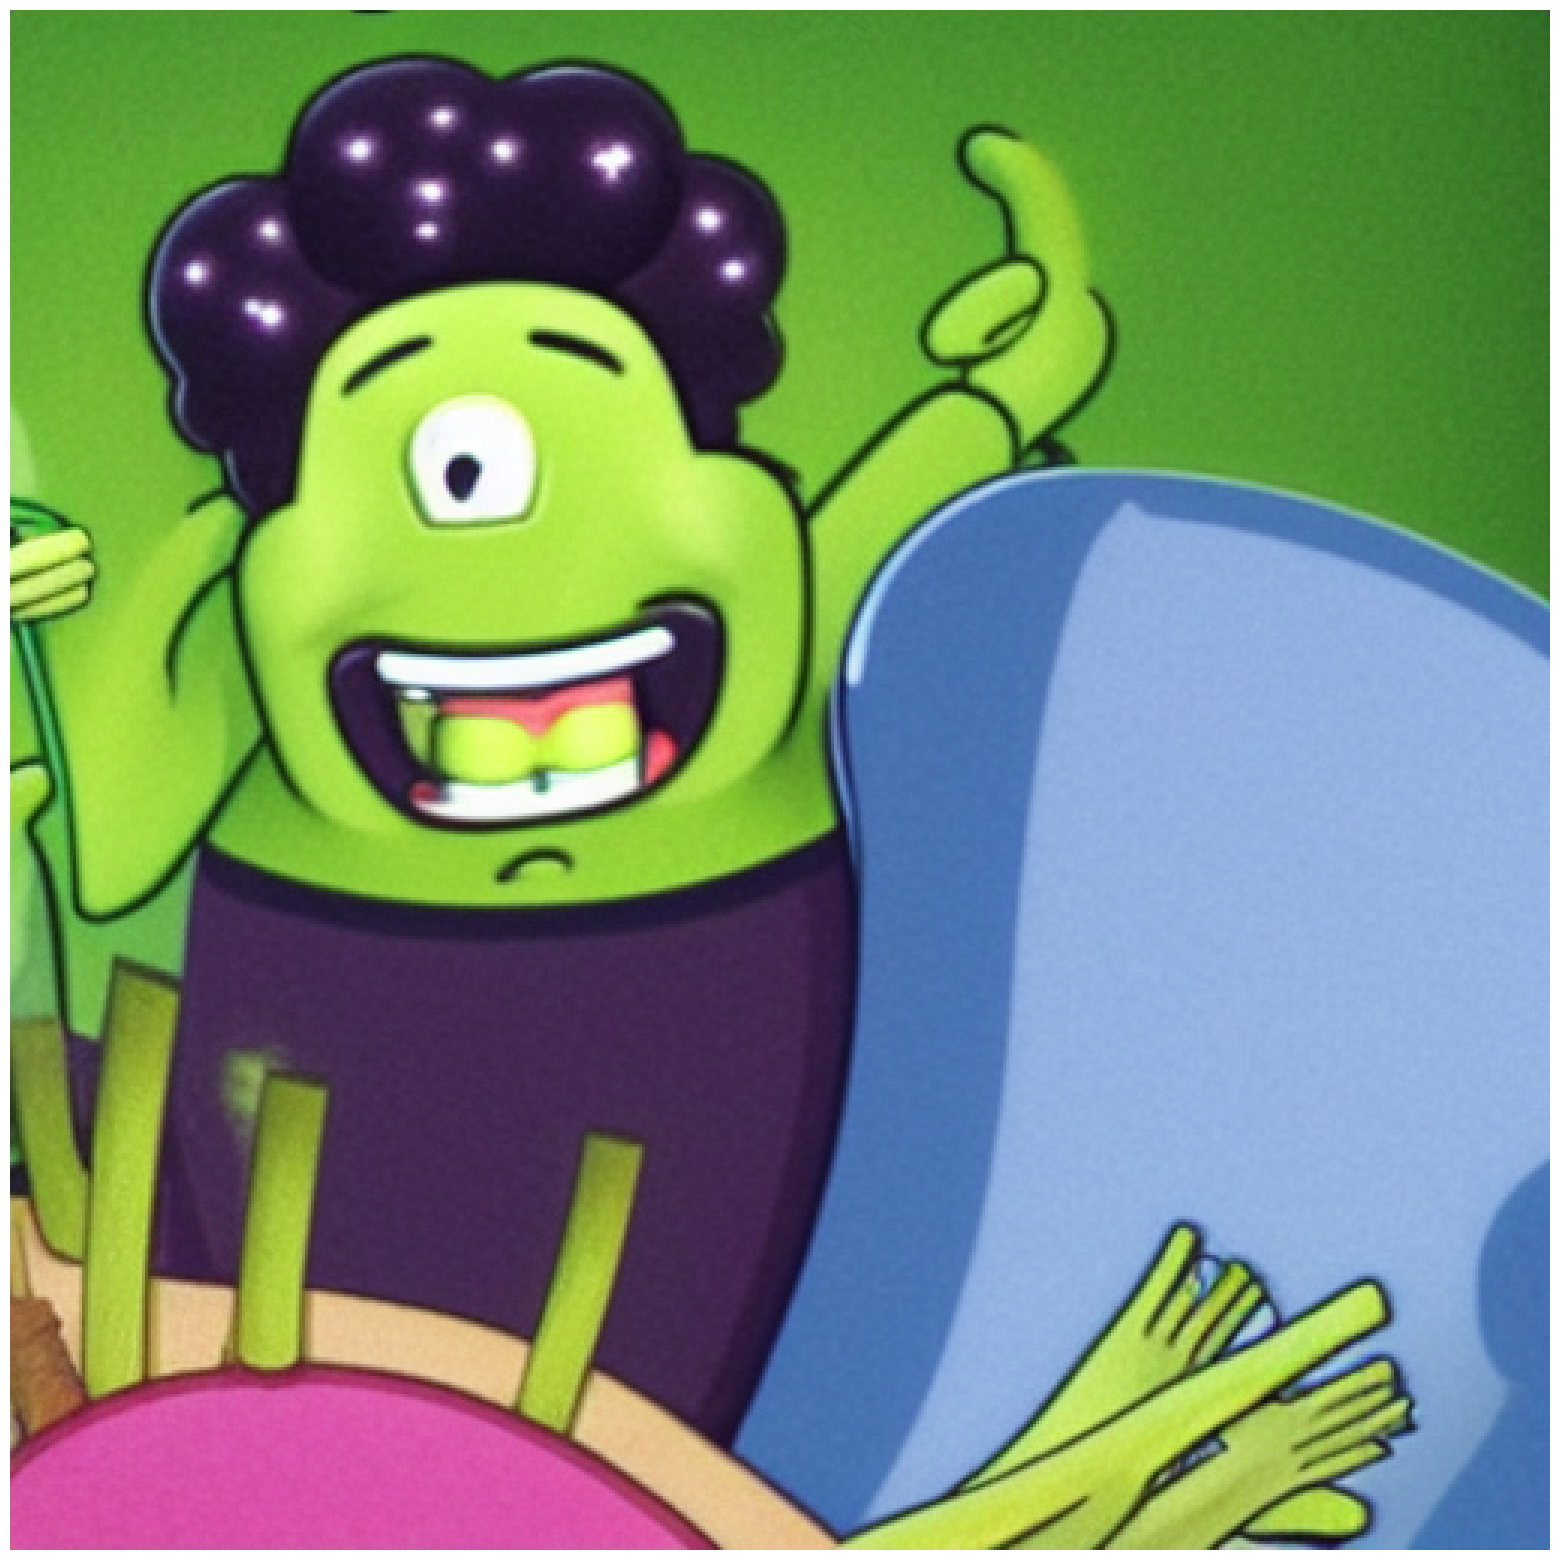

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_interpolation, batch_size = number, num_steps = 30, seed=2
)
txt.plot_images(generated)

31/31 [==============================] - 34s 1s/step


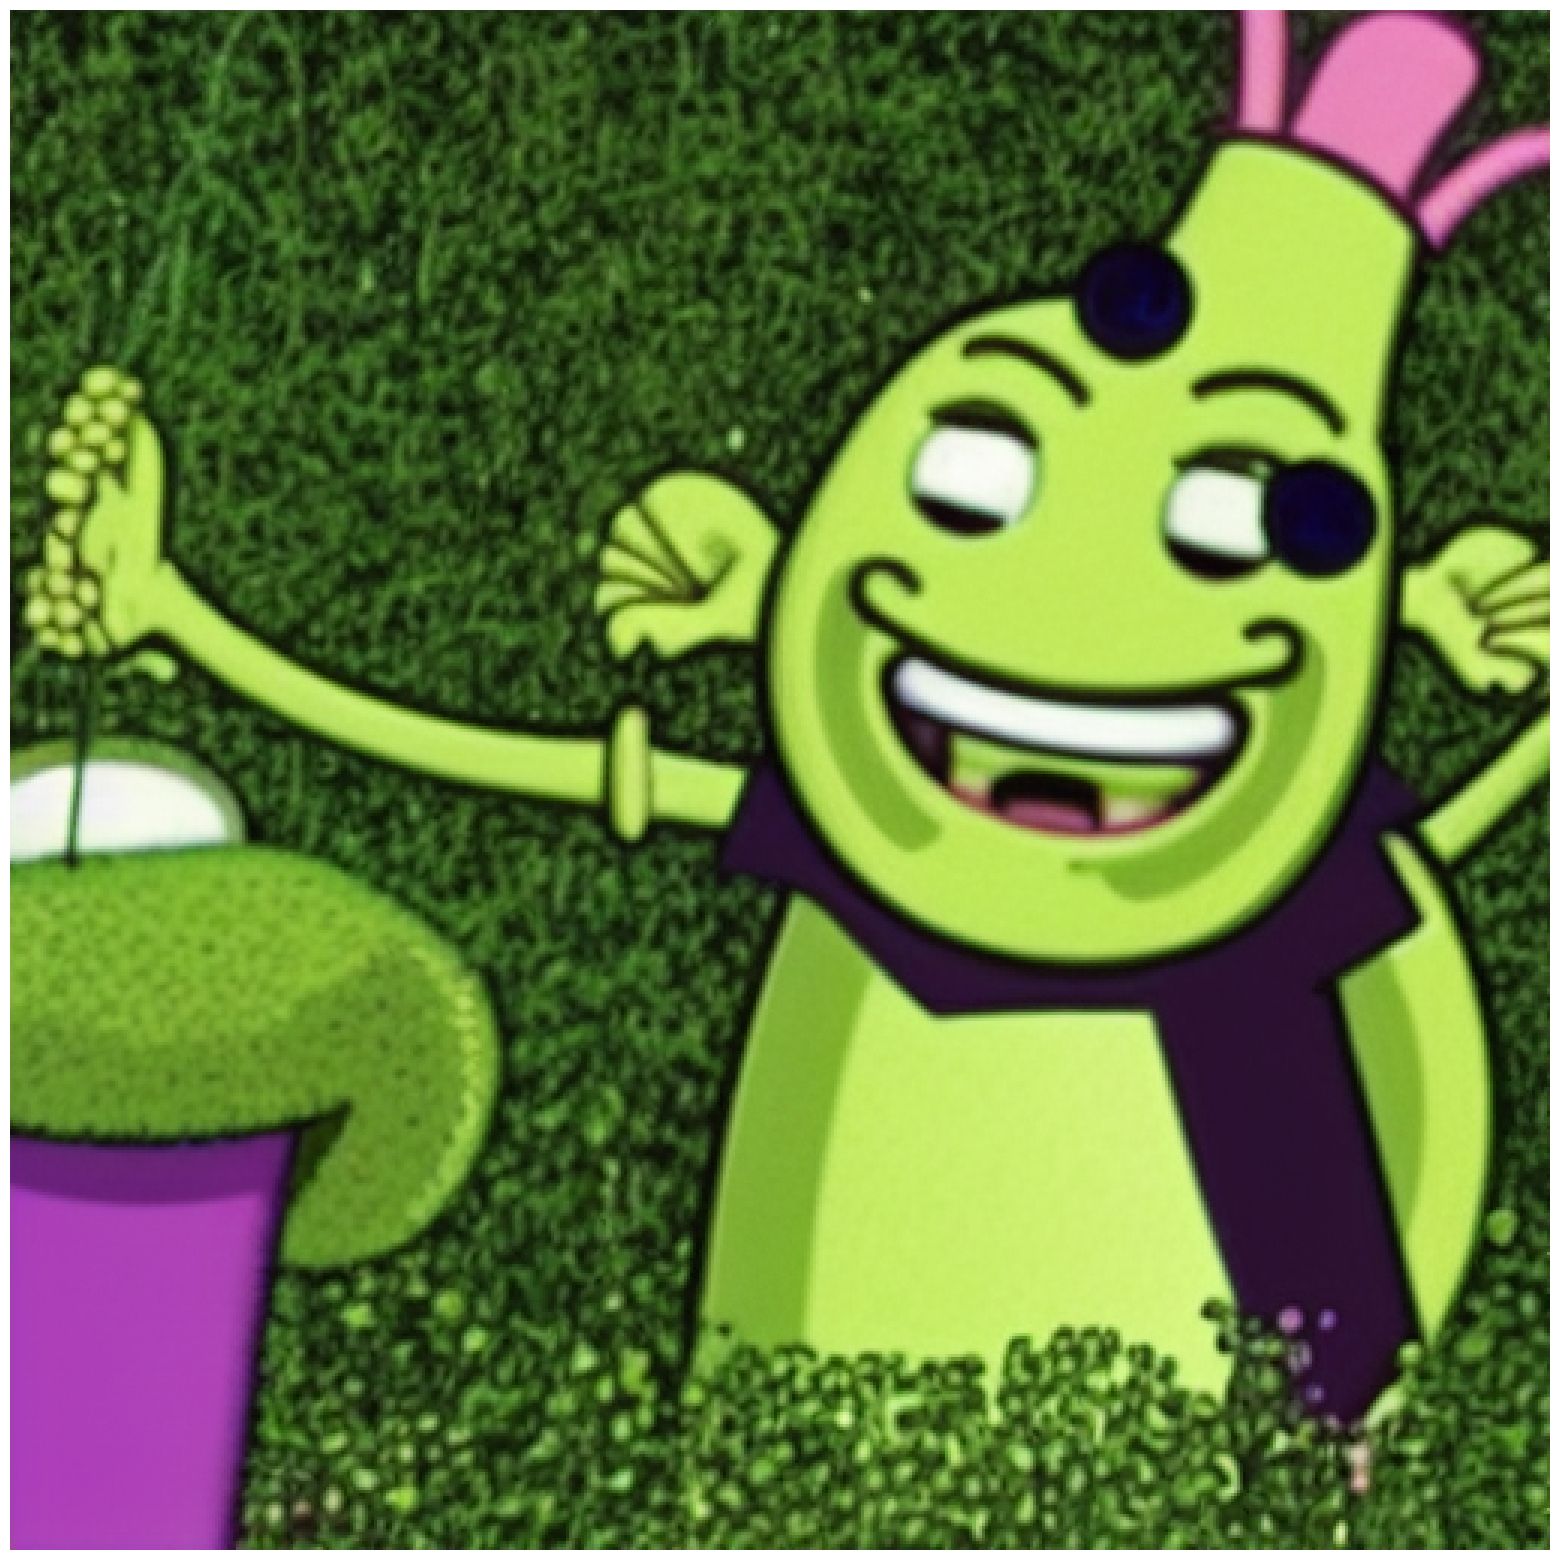

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_interpolation, batch_size = number, num_steps = 30, seed=4
)
txt.plot_images(generated)

31/31 [==============================] - 34s 1s/step


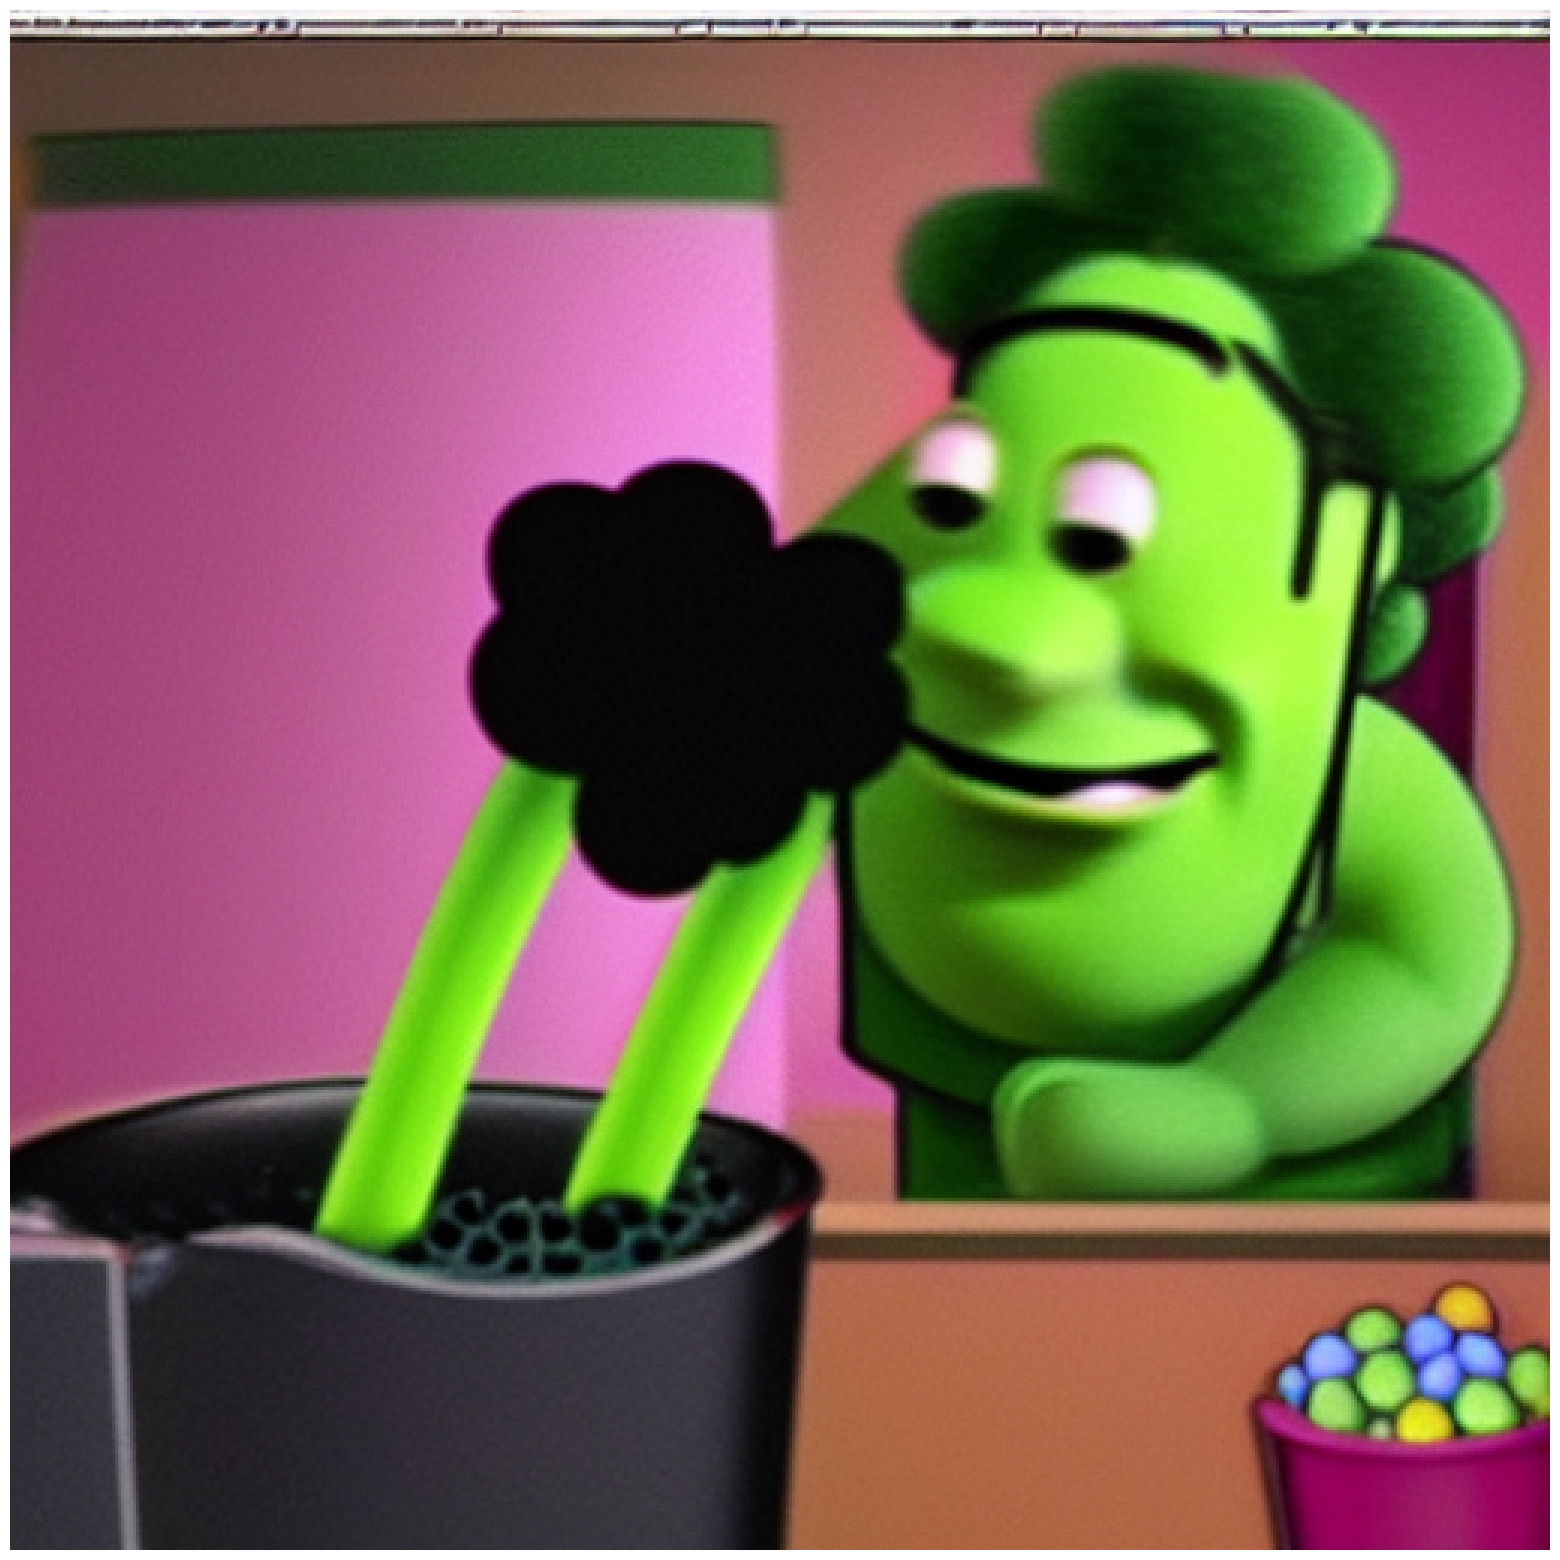

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_interpolation, batch_size = number, num_steps = 30, seed=8
)
txt.plot_images(generated)

25/25 [==============================] - 27s 1s/step


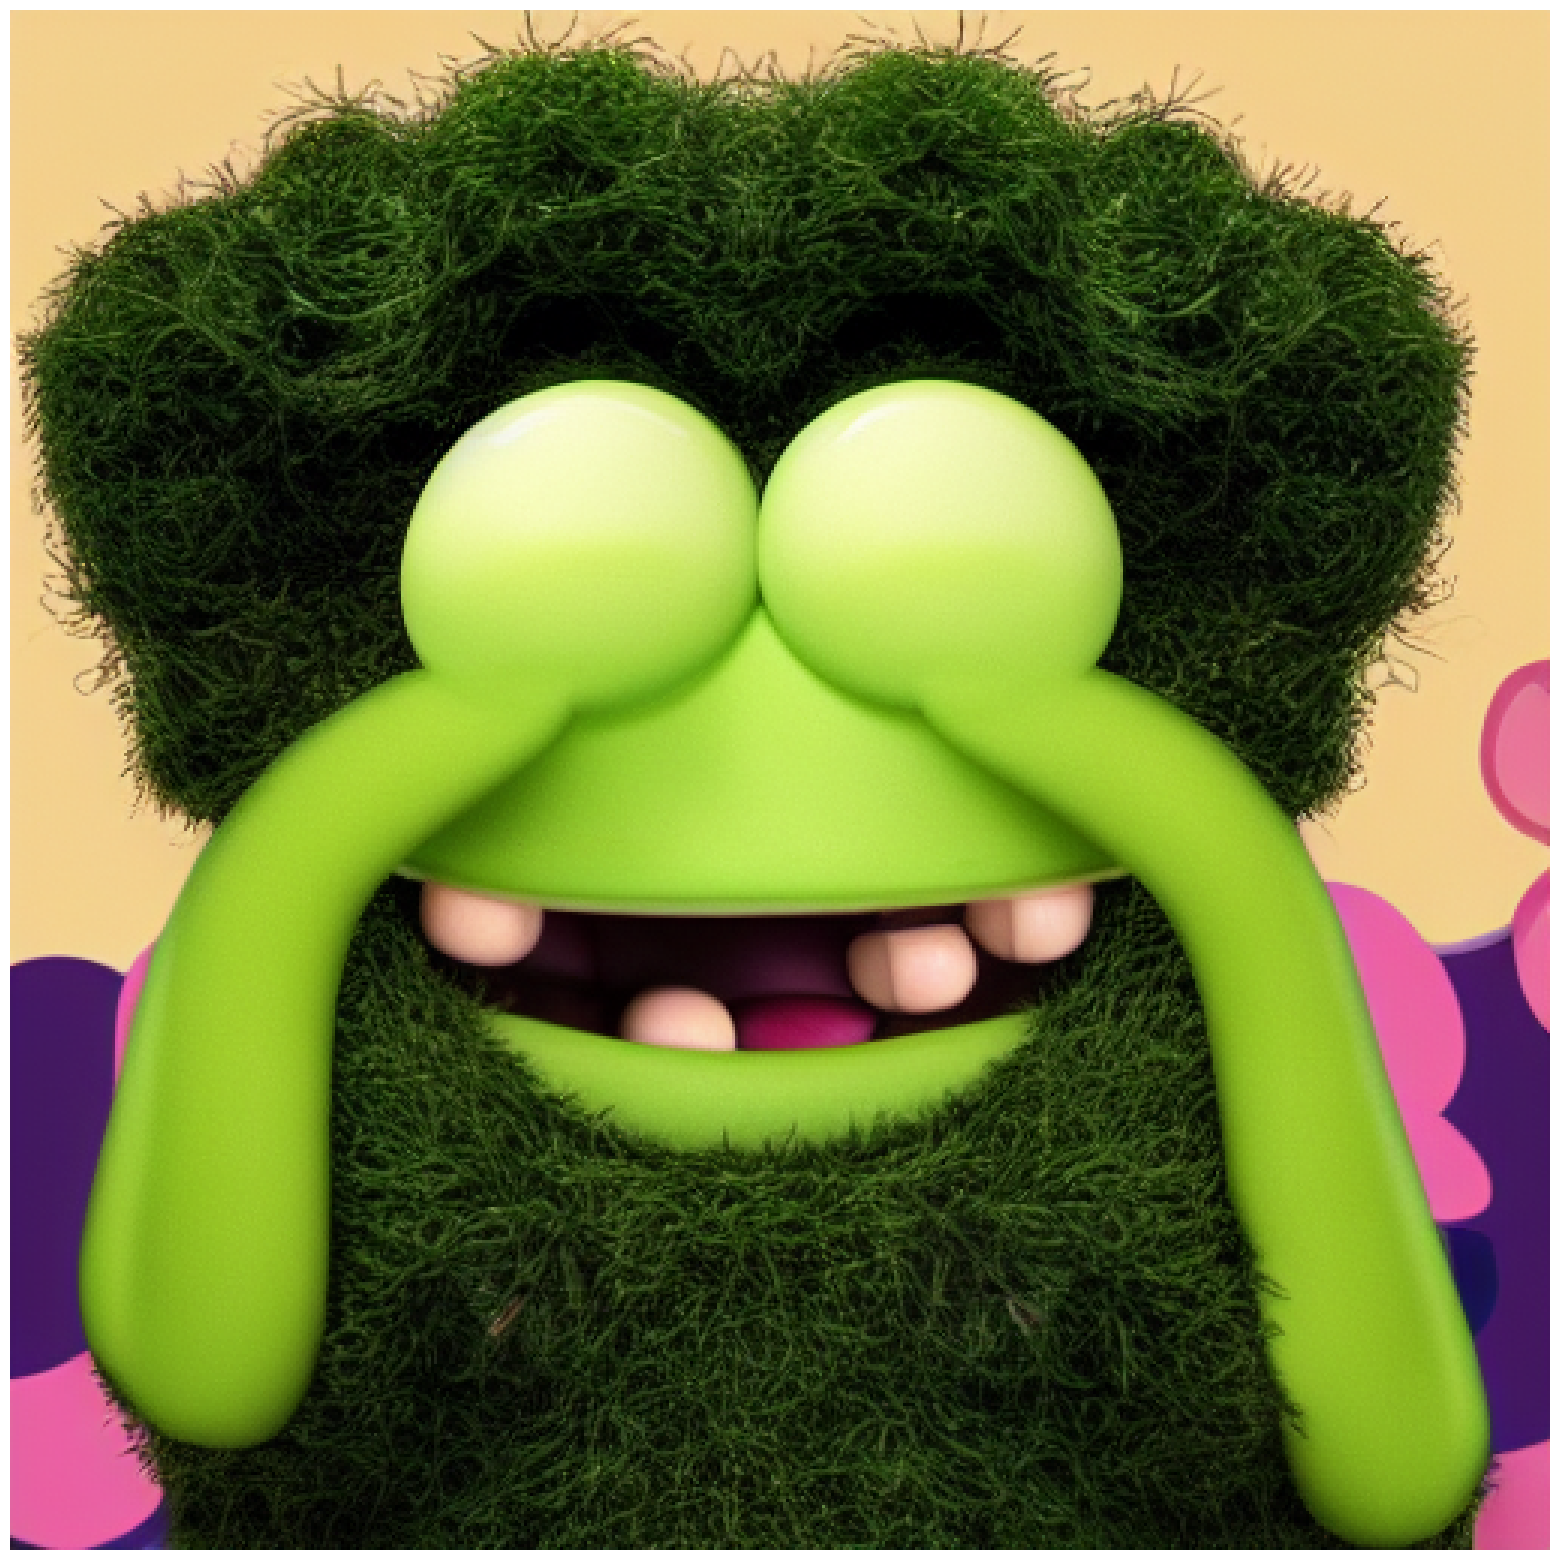

In [ ]:
generated = stable_diffusion.text_to_image(
    prompt_interpolation, batch_size = number, num_steps = 25, seed=16
    )
txt.plot_images(generated)